<a href="https://colab.research.google.com/github/yumeniown/modul-2_7/blob/main/ht2_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Задание
Используем набор данных о винах. Вам необходимо будет предсказать качество вина по его характеристикам.

1. Для начала подготовим данные к бинарной классификации. Условно разделим вино на хорошее и плохое. Хорошим вином будем называть вино, параметр quality которого  6, плохим — всё остальное.

2. Разделим на тренировочную и тестовую, параметры test_size=0.2, random_state=42

3. Обучите на тренировочной выборке модель случайного леса, состоящего из 500 деревьев. Максимальная глубина каждого из деревьев — 8. Минимальное число объектов в листе — 10. В качестве критерия информативности используйте критерий Джини. Количество признаков, на которых обучается каждое из деревьев, возьмите как корень из m, где m — общее количество признаков. В качестве значения параметра random_state возьмите число 42.

4. Сделайте предсказание качества вина для тренировочного и тестового наборов данных.

5. Дополнительно: обучить модель логистической регрессии/попробовать применить другие ансамбли

**1. Для начала подготовим данные к бинарной классификации. Условно разделим вино на хорошее и плохое. Хорошим вином будем называть вино, параметр quality которого  6, плохим — всё остальное.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn')

df = pd.read_csv('wine.csv', sep=';')


In [ ]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
X = df.drop('quality', axis=1)

y = (df['quality'] == 6).astype(int)

Распределение хорошего и плохого вина:
quality
0    0.601001
1    0.398999
Name: proportion, dtype: float64


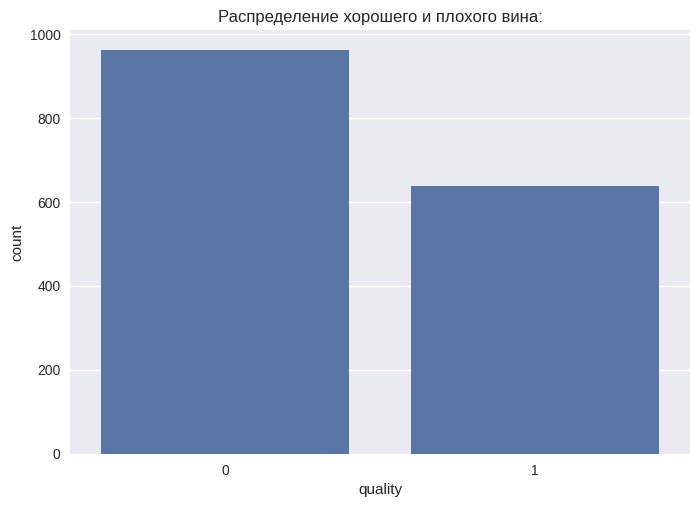

In [ ]:
class_distribution = y.value_counts(normalize=True)
print("Распределение хорошего и плохого вина:")
print(class_distribution)

sns.countplot(x=y)
plt.title("Распределение хорошего и плохого вина:")
plt.show()

Из графика видно, что распределение классов несбалансированное, т.е. в данных значительно больше плохих вин по сравнению с хорошими

**2. Разделим на тренировочную и тестовую, параметры test_size=0.2, random_state=42**

In [ ]:
from sklearn.model_selection import train_test_split

# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Посмотрим на размерности выборок
print(f'Тренировочная выборка: {X_train.shape}')
print(f'Тестовая выборка: {X_test.shape}')

Тренировочная выборка: (1279, 11)
Тестовая выборка: (320, 11)


In [ ]:
# Проверим распределение классов в тренировочной и тестовой выборках
train_class_distribution = y_train.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)

print("Распределение классов в тренировочной выборке: \n")
print(train_class_distribution, '\n')
print("------------------------------------------ \n")
print("Распределение классов в тестовой выборке: \n")
print(test_class_distribution)

Распределение классов в тренировочной выборке: 

quality
0    0.604378
1    0.395622
Name: proportion, dtype: float64 

------------------------------------------ 

Распределение классов в тестовой выборке: 

quality
0    0.5875
1    0.4125
Name: proportion, dtype: float64


Распределение остается несбалансированным, но достаточно близко по значениям, что важно для корректного обучения модели

**3. Обучите на тренировочной выборке модель случайного леса, состоящего из 500 деревьев. Максимальная глубина каждого из деревьев — 8. Минимальное число объектов в листе — 10. В качестве критерия информативности используйте критерий Джини. Количество признаков, на которых обучается каждое из деревьев, возьмите как корень из m, где m — общее количество признаков. В качестве значения параметра random_state возьмите число 42.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Обучение модели случайного леса
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_leaf=10,
    criterion='gini',
    max_features='sqrt',
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_estimators=500,
                       random_state=42)

**4. Сделайте предсказание качества вина для тренировочного и тестового наборов данных.**


In [ ]:
from sklearn.metrics import classification_report

# Формируем предсказания для тренировочной и тестовой выборки
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
# Оцениваем результаты для тренировочной выборки
print("Результат по классификации для тренировочной выборки:")
print(classification_report(y_train, y_train_pred))

# Оцениваем результаты для тестовой выборки
print("Результат по классификации для тестовой выборки:")
print(classification_report(y_test, y_test_pred))


Результат по классификации для тренировочной выборки:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       773
           1       0.86      0.68      0.76       506

    accuracy                           0.83      1279
   macro avg       0.84      0.81      0.82      1279
weighted avg       0.84      0.83      0.83      1279

Результат по классификации для тестовой выборки:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       188
           1       0.56      0.37      0.45       132

    accuracy                           0.62       320
   macro avg       0.60      0.58      0.58       320
weighted avg       0.61      0.62      0.60       320



Модель случайного леса показывает высокую точность на тренировочной выборке, что может говорить о переобучении

**5. Дополнительно: обучить модель логистической регрессии/попробовать применить другие ансамбли**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Логистическая регрессия
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_test_pred_log_reg = log_reg.predict(X_test)
print("Отчет по классификации для логистической регрессии:")
print(classification_report(y_test, y_test_pred_log_reg))

# Градиентный бустинг
gb = GradientBoostingClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_leaf=10,
    learning_rate=0.1,
    random_state=42
)

gb.fit(X_train, y_train)
y_test_pred_gb = gb.predict(X_test)
print("Отчет по классификации для градиентного бустинга:")
print(classification_report(y_test, y_test_pred_gb))

Отчет по классификации для логистической регрессии:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68       188
           1       0.45      0.25      0.32       132

    accuracy                           0.56       320
   macro avg       0.52      0.52      0.50       320
weighted avg       0.54      0.56      0.53       320

Отчет по классификации для градиентного бустинга:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       188
           1       0.65      0.61      0.63       132

    accuracy                           0.70       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.70      0.70      0.70       320



**Вывод:** модель градиентного бустинга показывает результаты лучше по сравнению с логистической регрессией. Градиентный бустинг имеет более высокую точность, полноту и F1-меру для обоих классов, а также общую точность 70% по сравнению с 56% у логистической регрессии. Это подтверждает, что градиентный бустинг более эффективно справляется с задачей классификации вин, правильно различая как хорошие, так и плохие вина. Логистическая регрессия показывает слабые результаты, особенно в отношении классификации хороших вин, что указывает на её ограниченные возможности